In [1]:
# Nos vamos a enfocar en un algoritmo que nos ayuda a limpiar nuestros datos.
# Es muy importante generar el algoritmo que va a generar nuestras predicciones
# per también es muy importante limpiarla y optimizarla.
# PCA: Principal Component Analysis.
# Este algoritmo nos va a permitir reducir el número de ruido que tenemos en nuestros
# datos y poder visualizar datos que tenemos en muchas dimensiones en solo dos dimensiones.
# Por ejemplo, si tenemos un DataSet con 30 características (30 ejes) podemos reducirlo
# a solo dos ejes.

In [1]:
import sklearn
import mglearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
#import
#"%matplotlib inline" = Posibilidad de ver en Jupiter las gráficas.

In [2]:
# Cargamos un ejemplo de lo que hace PCA:

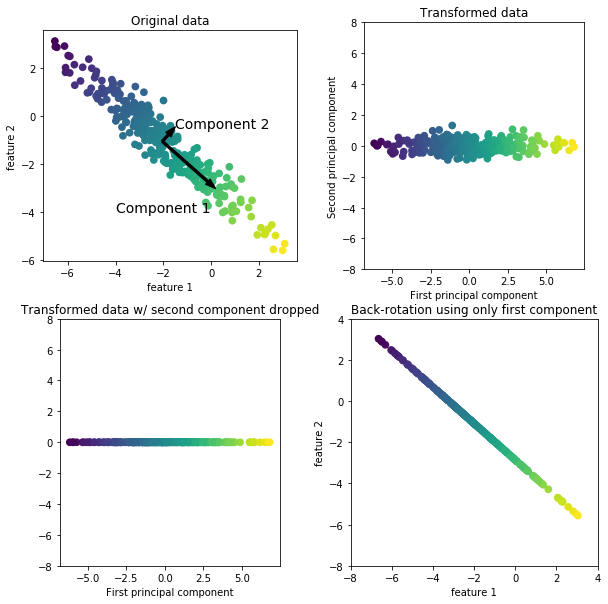

In [3]:
mglearn.plots.plot_pca_illustration()

In [4]:
# 1.- Saca las dos líneas o divisiones.
# 2.- Rota y resta el promedio.
# 3.- Proyección, MODELO 1.
# 4.- Proyección, MODELO 2.
#
# Como vemos, es casi una representeción de una línear recta.
# Todo lo que se salga de esta línea es ruido.

In [7]:
# Vamos a ver como usar PCA para limpiar los datos de mi DataSet.
# Primero asigno a la variable cancer nuestra dataset cancer.
# Imprimo el nombre de las características (tiene bastantes).

In [8]:
cancer = load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# Imprimo la cantidad de características:
# Tiene 30 características y ahora mismo no podríamos graficar
# esto. Demasido complicado visualmente.

In [10]:
cancer.feature_names.shape

(30,)

In [14]:
# A nuestra variable de PCA la inicializo con nuestra variable "pca".
# Le digo que solo quiero dos componentes: el de mayor varianza y el ortogonal.
# Lo entreno.

In [13]:
pca = PCA(n_components = 2)
pca.fit(cancer.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
# Ahora queremos que lo transforme y lo envíe a la variable "transformada".

In [16]:
transformada = pca.transform(cancer.data)

In [17]:
# Imprimo la forma original y la forma transformada para ver la diferencia:

In [19]:
print(cancer.data.shape)
print(transformada.shape)

(569, 30)
(569, 2)


In [21]:
# ORIGINAL: 569 mediciones con 30 caracteríasticas (dimensiones) cada una.
# TRANSFORMADA: 569 mediciones con 2 caracteríasticas (dimensiones) cada una.

In [22]:
# Vamos a graficar nuestra gráfica transformada en el eje X (componente principal 1)
# y en el eje Y tenemos nuestro componente principal 2.

Text(0, 0.5, 'PCA 2')

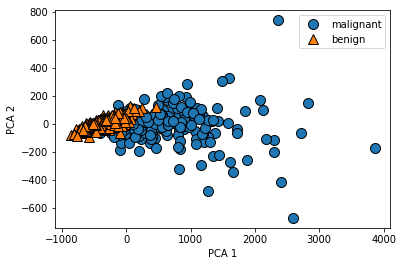

In [23]:
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], cancer.target)
plt.legend(cancer.target_names, loc = 'best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [24]:
# Esto es una abstracción de nuestros datos pero podemos ver que 
# todos los triángulos naranjas son tumores beningnos y todos los azules
# son los benignos.
# Esto nos da información ya que los benignos están en el lado izquierdo
# y los malignos en el lado derecho.

In [28]:
# Para ver que tan importante es pre-procesar nuestros datos voy a hacer lo 
# mismo que arriba pero con una nueva función llamada "MinMixScaler".
# Tenemos nuestras mediciones del set de datos y los vamos a poner todos
# en un rango similar en el rango de 0 a 1.
# Ayuda a no manejar modelos muy pequenios o muy grandes.
# Observa los números de la gráfica.

Text(0.5, 0, 'PCA 2')

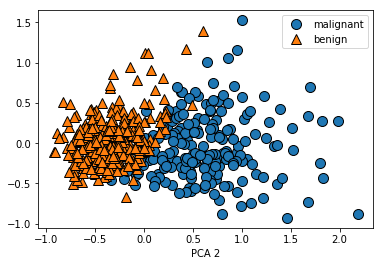

In [29]:
from sklearn.preprocessing import MinMaxScaler
escala = MinMaxScaler()
escala.fit(cancer.data)
escalada = escala.transform(cancer.data)
pca.fit(escalada)
transformada = pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], cancer.target)
plt.legend(cancer.target_names, loc = 'best')
plt.gca()
plt.xlabel('PCA 1')
plt.xlabel('PCA 2')

In [30]:
# Vemos que nuestros datos siguen estando (Benigno = izq, Maligno = dcha).
# Esto implica que tenemos un correlación.
# Nuestros datos si nos van a servir para hacer predicciones.

In [ ]:
# Como se ven nuestros datos cuando SI son escalados {Valores de 0 a 1}

In [31]:
escalada

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [ ]:
# Como se ven nuestros datos cuando NO son escalados {Valores muy pequenios}

In [32]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
# Ahora podemos decidir si a nuestro algoritmo lo alimentamos con nuestros datos
# originales o con los nuevos transformados.
# Si decidimos entrenarlo con nuestros datos ya transformados probablemente vaya
# a trazar una línea oblícua que separe los dos tipos de cancer en la última gráfica
# transforamada.
# Esto nos ayuda a distinguir patrones de manera más obvia.